# פרויקט למידת מכונה
#### מקסים פולק - 209383322
#### רז רווח - 208292789
**GitHub:** [קישור לפרויקט ב-GitHub]  

In [143]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [144]:
myData = pd.read_csv('train.csv')
myData

,property_type,neighborhood,address,room_num,floor,area,garden_area,days_to_enter,num_of_payments,monthly_arnona,...,ac,handicap,has_bars,has_safe_room,has_balcony,is_furnished,is_renovated,price,num_of_images,distance_from_center
0,דירה,הצפון הישן החלק המרכזי,"מהר""ל 25",3.0,2,71,NaN,0.0,12.0,467.0,...,1,0,0,1,1,0,0,10150.0,6.0,1005.00
1,דירה,הצפון הישן החלק המרכזי,ארלוזורוב 35,3.0,1,70,NaN,0.0,12.0,240.0,...,1,0,1,0,1,0,0,6600.0,3.0,253.00
2,דירה,הצפון הישן החלק המרכזי,וורמיזה 5,2.5,1,65,NaN,NaN,12.0,400.0,...,1,1,0,0,1,0,1,9000.0,8.0,740.00
3,דירה,הצפון הישן החלק המרכזי,עמנואל הרומי 30,2.0,3,40,NaN,0.0,12.0,100.0,...,0,0,0,0,0,0,0,5800.0,2.0,1206.00
4,דירה,הצפון הישן החלק המרכזי,ארלוזורוב 50,3.0,1,70,NaN,0.0,11.0,250.0,...,1,0,1,0,0,0,1,7700.0,5.0,255.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,גג/פנטהאוז,מונטיפיורי,יהודית 33,2.5,5,55,0.0,0.0,12.0,500.0,...,1,0,0,1,1,0,1,6300.0,3.0,1.69
784,דירה,הצפון הישן החלק הדרום מערבי,בן יהודה 88,3.0,2,90,0.0,0.0,12.0,500.0,...,1,0,0,0,0,1,1,15000.0,4.0,1.11
785,דירה,הצפון הישן החלק הדרום מערבי,רופין 22,2.0,3,80,0.0,0.0,12.0,450.0,...,1,0,0,0,1,0,1,8000.0,5.0,1.57
786,סטודיו/לופט,מונטיפיורי,שדרות יהודית 27,1.0,3,30,0.0,0.0,6.0,180.0,...,1,0,0,0,0,1,1,4000.0,0.0,3.21


In [145]:
myData.isnull().sum() ## Cheking where is Null in the data

property_type             2
neighborhood              4
address                  30
room_num                  0
floor                     5
area                      0
garden_area             126
days_to_enter           180
num_of_payments           7
monthly_arnona          160
building_tax            132
total_floors             45
description               5
has_parking               0
has_storage               0
elevator                  0
ac                        0
handicap                  0
has_bars                  0
has_safe_room             0
has_balcony               0
is_furnished              0
is_renovated              0
price                     2
num_of_images             1
distance_from_center     19
dtype: int64

## Exploratory Data Analysis (EDA)

Before applying preprocessing and building the `prepare_data()` function, we explored the dataset to understand its structure, identify missing values, and decide which features are relevant or redundant.

Here are some of the checks we performed:
- Reviewed the unique values in key categorical fields (`property_type`, `neighborhood`, `address`)
- Inspected missing values in numerical fields such as `floor`, `total_floors`, `garden_area`, and `distance_from_center`
- Noted that the `days_to_enter` column contains mostly 0s or missing values, indicating immediate availability – this makes the column redundant for prediction and we decided to drop it
- Observed that missing values in `distance_from_center` occurred only in a few neighborhoods and were handled accordingly


In [146]:
### הכל פה בהערות כי אם אני מריץ את זה שורה אחרי שורה אז העבודה נהיית מאוד ארוכה , רק רציתי להעביר את העיקרון שעברתי על הדאטה
#pd.DataFrame(myData["property_type"].unique()) ##בדקתי את הסוג ערך
#pd.DataFrame(myData["neighborhood"].unique()) ##בדקתי את השכונות
#pd.DataFrame(myData["address"].unique()) ##בדקתי את הרחובות
#pd.DataFrame(myData["floor"].unique()) ## בודק ערכים ב floor
#myData[myData["floor"].isnull()] ##הסתכלתי איך נראים הערכים חסרים בעמודה floor
#myData[myData["total_floors"].isnull()] ##הסתכלתי איך נראים הערכים חסרים בעמודה total_floor
#myData[myData["garden_area"].isnull()]
#pd.DataFrame(myData["days_to_enter"].value_counts()) ### אפשר לראות שרוב הערכים הם 0 וערכים חסרים כלומר גם הערכים החסרים הם כנראה 0 כלומר כניסה מיידית ומכיוון שכל העמודה הזאת עם אותו הערך אנחנו נוציא אותה מהמודל
#myData[myData["distance_from_center"].isnull()]  הסתכלתי איך נראה הערכים החסרים במרחק מהמרכז וראיתי שזה רק ב4 שכונות אז טיפלתי בהם
ohe_property = None
median_by_neighborhood = None
scaler = None
neighborhood_price_map = None

### Boxplot Visualization of Numerical Features

To better understand the distribution and identify potential outliers in our dataset, we used boxplots for key numerical variables such as `area`, `price`, and `distance_from_center`.

These visualizations helped guide decisions during preprocessing – for example, whether to handle or cap outliers.


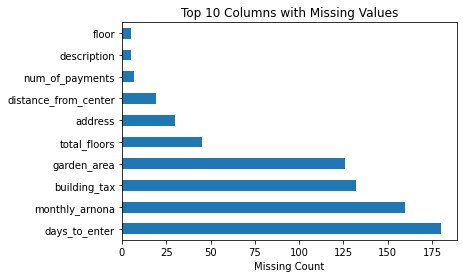

In [147]:
myData.isnull().sum().sort_values(ascending=False).head(10).plot(
    kind='barh',
    title='Top 10 Columns with Missing Values'
)
plt.xlabel("Missing Count")
plt.show()

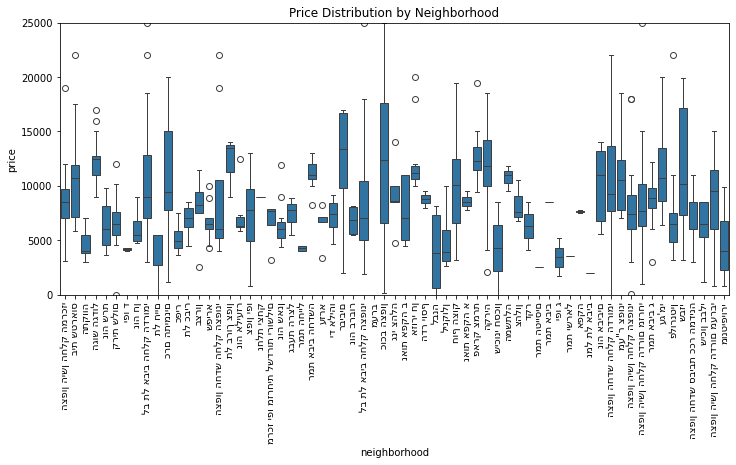

In [148]:
plt.figure(figsize=(12,5))
sns.boxplot(x='neighborhood', y='price', data=myData)
plt.xticks(rotation=90)
plt.title("Price Distribution by Neighborhood")
plt.ylim(0, 25000)
plt.show()

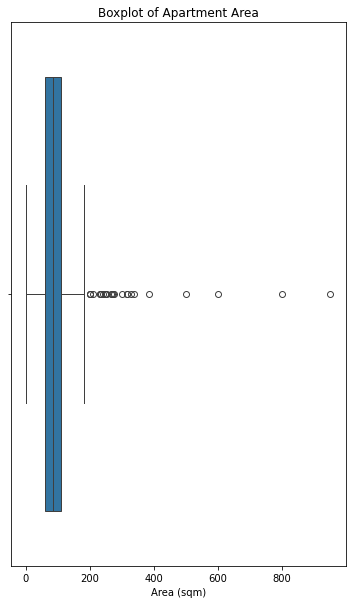

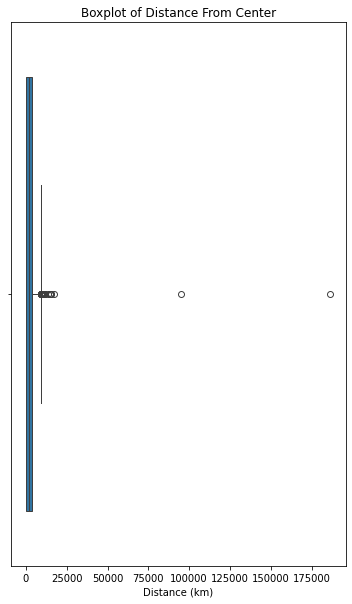

In [149]:
# Boxplot for apartment area
plt.figure(figsize=(6, 10))
sns.boxplot(x=myData['area'])
plt.title("Boxplot of Apartment Area")
plt.xlabel("Area (sqm)")
plt.show()

# Boxplot for distance from center
plt.figure(figsize=(6, 10))
sns.boxplot(x=myData['distance_from_center'])
plt.title("Boxplot of Distance From Center")
plt.xlabel("Distance (km)")
plt.show()

## Step 1 – Data Preprocessing

In this step, we define the `prepare_data()` function which performs the required preprocessing on any dataset that matches the expected structure.  
The function distinguishes between the training and test sets, handles missing values, performs feature engineering, and filters relevant features for modeling.

The function returns a new DataFrame containing only the features selected for training and evaluation.

In [150]:
def prepare_data(data_file, dataset_type):
    myData = pd.read_csv(data_file)
    myData.drop_duplicates(subset=myData.columns, inplace=True) ## Making sure that there is no duplicates in the data
    myData = myData.drop(["description", "num_of_payments", "num_of_images" , "address", "days_to_enter", "monthly_arnona" , "building_tax"], axis=1) ## Dropping columns that not affecting the price

    ###### Changing the "price" ONLY FOR TRAIN #####
    if (dataset_type == "train"):
        myData = myData.dropna(subset=["price"])  ## מעיף את הערכים החסרים
        
    ###### Changing the "property_type" #####
    ### מעיף ערכים לא רלוונטים ובנוסף מאחד תחת אותו ערך ערכים שכתובים דומה
    
    irrelevant_values = [
    "מחסן", 
    "חניה", 
    "באתר מופיע ערך שלא ברשימה הסגורה", 
    np.nan
    ]
    myData = myData[~myData["property_type"].isin(irrelevant_values)]
    myData["property_type"] = myData["property_type"].str.lower()
    myData.loc[myData["property_type"].str.contains("דירת", na=False), "property_type"] = "דירת גן"
    myData.loc[myData["property_type"].str.contains("דירה", na=False) | myData["property_type"].str.contains("квартира", na=False), "property_type"] = "דירה"
    myData.loc[myData["property_type"].str.contains("פנטהאוז", na=False), "property_type"] = "גג/פנטהאוז"
    myData.loc[myData["property_type"].str.contains("קוטג", na=False), "property_type"] = "פרטי/קוטג"

    ##### Changing the "neighborhood"#####
    myData = myData.dropna(subset=["neighborhood"])  ## מעיף את הערכים החסרים כי אין לי איך להשלים

    ##### Changing the "floor" and "total_floor" #####
    ### יש שורות עם המילה "מתוך" אז אני מנסה לסדר את זה כמו שצריך וככה גם ממלא ערכים חסרים 
    for idx in myData[myData["floor"].str.contains("מתוך", na=False)].index:
        floors = myData.at[idx, "floor"].split()

        # שליפת קומה
        if "קרקע" in floors[0]:
            myData.at[idx, "floor"] = 0
        else:
            myData.at[idx, "floor"] = int(floors[0])

        # שליפת total_floors רק אם חסר
        if pd.isna(myData.at[idx, "total_floors"]):
            if "קרקע" in floors[2]:
                myData.at[idx, "total_floors"] = 0
            else:
                myData.at[idx, "total_floors"] = int(floors[2])
    # אחרי זה – להמיר ל־numeric כדי לוודא שהעמודות באמת מספריות
    myData["floor"] = pd.to_numeric(myData["floor"], errors="coerce")
    myData["total_floors"] = pd.to_numeric(myData["total_floors"], errors="coerce")
    myData = myData.dropna(subset=["floor"])  ## מעיף את הערכים החסרים כי אין לי איך להשלים
    myData = myData.dropna(subset=["total_floors"])  ## מעיף את הערכים החסרים כי אין לי איך להשלים

    ###### Changing the "garden_area" #####
    ### אם הקומה גדולה מ0 אז כנראה שאין גינה אז אם יש ערך חסר ניתן לו 0
    myData.loc[(myData["floor"] > 0) & (myData["garden_area"].isnull()), "garden_area"] = 0
    myData = myData.dropna(subset=["garden_area"])  ## מעיף את הערכים החסרים כי אין לי איך להשלים

    ###### Changing the "distance_from_center" #####
    #### סידור יחידות מידה
    myData["distance_from_center"] = myData["distance_from_center"].apply(
    lambda x: x * 1000 if x < 50 else x)

    # מחשב את החציון לפי שכונה
    global median_by_neighborhood

    if dataset_type == "train":
        median_by_neighborhood = myData.groupby("neighborhood")["distance_from_center"].median()

    # Defensive check before using
    if median_by_neighborhood is None:
        raise ValueError("median_by_neighborhood is not initialized. Run prepare_data with 'train' first.")

    myData["distance_from_center"] = myData.apply(
        lambda row: median_by_neighborhood.get(row["neighborhood"], np.nan)
        if pd.isnull(row["distance_from_center"])
        else row["distance_from_center"],
        axis=1
    )

    # מילוי ידני לשכונות שאין להן חציון גם ב־train
    myData.loc[myData["neighborhood"] == "כוכב הצפון", "distance_from_center"] = 5500
    myData.loc[myData["neighborhood"] == "גני צהלה", "distance_from_center"] = 6500

    ###### סינון ערכים קיצוניים ######
    myData = myData[
        (myData["room_num"] <= 10) &
        (myData["room_num"] >= 1) &  # גם לוודא שיש לפחות חדר אחד
        (myData["area"] <= 300) &
        (myData["area"] >= 20) &  # לא דירות של 12 מ"ר...
        (myData["garden_area"] <= 150) &
        (myData["floor"] <= myData["total_floors"]) &
        (myData["floor"] <= 50) &
        (myData["total_floors"] <= 70) &
        (myData["price"] <= 25000 if "price" in myData.columns else True) &  # לא מעבר למחיר מטורף
        (myData["price"] >= 3500 if "price" in myData.columns else True) &   # שכר דירה לא הגיוני
        (myData["distance_from_center"] <= 15000)
    ]


    ####### ONE-HOT-ENCODER #######
    ### OHE To dataset_type ###
    global ohe_property  
    if dataset_type == "train":
        ohe_property = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        property_encoded = ohe_property.fit_transform(myData[["property_type"]])
    else:  # dataset_type == "test"
        property_encoded = ohe_property.transform(myData[["property_type"]])

    # הפיכת הקידוד ל־DataFrame
    property_encoded_df = pd.DataFrame(property_encoded, columns=ohe_property.get_feature_names_out(["property_type"]))

    # איפוס אינדקס וחיבור לעמודות
    myData = myData.drop("property_type", axis=1).reset_index(drop=True)
    property_encoded_df = property_encoded_df.reset_index(drop=True)
    myData = pd.concat([myData, property_encoded_df], axis=1)



    ###### NEW: Average price per neighborhood ######
    global neighborhood_price_map

    if dataset_type == "train":
        # ב־train מחשבים את הממוצע לכל שכונה
        neighborhood_price_map = myData.groupby("neighborhood")["price"].mean()

    # לכל סוג דאטא (train או test) ממירים את השכונה לממוצע מחיר
    myData["neighborhood_avg_price"] = myData["neighborhood"].map(neighborhood_price_map)

    # אם יש שכונות שלא הופיעו ב־train (למשל ב־test) → ממלאים את הממוצע הכללי
    myData["neighborhood_avg_price"] = myData["neighborhood_avg_price"].fillna(neighborhood_price_map.mean())

    # עכשיו אפשר להעיף את עמודת neighborhood – כי לא צריך OHE
    myData = myData.drop("neighborhood", axis=1)


    ########## Standardization #######
    global scaler
    numerical_cols = ["room_num", "area", "floor", "total_floors", "garden_area", "distance_from_center"]

    if dataset_type == "train":
        scaler = StandardScaler()
        myData[numerical_cols] = scaler.fit_transform(myData[numerical_cols])
    else:
        myData[numerical_cols] = scaler.transform(myData[numerical_cols])


    ###### Puting the price column to be the last 
    if (dataset_type == "train"):
        myData = myData[[col for col in myData.columns if col != "price"] + ["price"]]  
    return myData

## Applying `prepare_data()` and Verifying the Output

Now that the `prepare_data()` function is defined, we apply it to the training dataset to ensure it correctly processes the data.  
We then check for any remaining missing values to verify that all necessary cleaning steps were performed within the function.


In [ ]:
myData = prepare_data('train.csv' , "train")
#myData = prepare_data('train.csv' , "test")


In [152]:
myData.isnull().sum() ## Cheking where is Null in the data

room_num                     0
floor                        0
area                         0
garden_area                  0
total_floors                 0
has_parking                  0
has_storage                  0
elevator                     0
ac                           0
handicap                     0
has_bars                     0
has_safe_room                0
has_balcony                  0
is_furnished                 0
is_renovated                 0
price                        0
distance_from_center         0
property_type_גג/פנטהאוז     0
property_type_דו משפחתי      0
property_type_דופלקס         0
property_type_דירה           0
property_type_דירת גן        0
property_type_החלפת דירות    0
property_type_יחידת דיור     0
property_type_כללי           0
property_type_מרתף/פרטר      0
property_type_סטודיו/לופט    0
property_type_פרטי/קוטג      0
neighborhood_avg_price       0
dtype: int64

In [153]:
print(myData.dtypes)

room_num                     float64
floor                        float64
area                         float64
garden_area                  float64
total_floors                 float64
has_parking                    int64
has_storage                    int64
elevator                       int64
ac                             int64
handicap                       int64
has_bars                       int64
has_safe_room                  int64
has_balcony                    int64
is_furnished                   int64
is_renovated                   int64
price                        float64
distance_from_center         float64
property_type_גג/פנטהאוז     float64
property_type_דו משפחתי      float64
property_type_דופלקס         float64
property_type_דירה           float64
property_type_דירת גן        float64
property_type_החלפת דירות    float64
property_type_יחידת דיור     float64
property_type_כללי           float64
property_type_מרתף/פרטר      float64
property_type_סטודיו/לופט    float64
p

In [154]:
myData

,room_num,floor,area,garden_area,total_floors,has_parking,has_storage,elevator,ac,handicap,...,property_type_דופלקס,property_type_דירה,property_type_דירת גן,property_type_החלפת דירות,property_type_יחידת דיור,property_type_כללי,property_type_מרתף/פרטר,property_type_סטודיו/לופט,property_type_פרטי/קוטג,neighborhood_avg_price
0,-0.194171,-0.433074,-0.471085,-0.25184,-0.459095,1,1,1,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9127.475000
1,-0.194171,-0.657004,-0.499159,-0.25184,-0.459095,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9127.475000
2,-0.680362,-0.657004,-0.639531,-0.25184,-0.459095,1,0,1,1,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9127.475000
3,-1.166553,-0.209143,-1.341391,-0.25184,-0.575238,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9127.475000
4,-0.194171,-0.657004,-0.499159,-0.25184,-0.459095,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9127.475000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,-0.680362,0.238719,-0.920275,-0.25184,-0.342951,1,0,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6850.000000
632,-0.194171,-0.433074,0.062329,-0.25184,-0.459095,0,0,1,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8863.333333
633,-1.166553,-0.209143,-0.218415,-0.25184,-0.342951,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8863.333333
634,-2.138936,-0.209143,-1.622135,-0.25184,-0.575238,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6850.000000


## Step 2 – Elastic Net Model

The Elastic Net model is a regression method useful when multicollinearity exists between features. It combines both L1 (Lasso) and L2 (Ridge) regularization.

Process:
- Uses features selected during preprocessing
- Trained using `ElasticNetCV` with 10-fold cross-validation
- Performance metrics reported: MAE, RMSE, and R²
- Top five most influential features (positive or negative) are identified

In [155]:
cols_to_check = [
    "room_num", "floor", "area", 
    "garden_area", "total_floors", 
    "price", "distance_from_center"
]

print(myData[cols_to_check].describe())

           room_num         floor          area   garden_area  total_floors  \
count  6.360000e+02  6.360000e+02  6.360000e+02  6.360000e+02    636.000000   
mean  -2.793014e-17 -4.468822e-17 -2.234411e-17  8.379042e-18      0.000000   
std    1.000787e+00  1.000787e+00  1.000787e+00  1.000787e+00      1.000787   
min   -2.138936e+00 -8.809350e-01 -1.902879e+00 -2.518397e-01     -0.923668   
25%   -6.803621e-01 -6.570043e-01 -6.395310e-01 -2.518397e-01     -0.459095   
50%   -1.941708e-01 -2.091428e-01 -7.804327e-02 -2.518397e-01     -0.342951   
75%    7.782120e-01  2.387186e-01  5.115189e-01 -2.518397e-01      0.005478   
max    3.695360e+00  3.597679e+00  5.256091e+00  8.409122e+00      4.883498   

              price  distance_from_center  
count    636.000000          6.360000e+02  
mean    9130.605346          4.468822e-17  
std     3747.978645          1.000787e+00  
min     3500.000000         -1.538931e+00  
25%     6475.000000         -8.485828e-01  
50%     8500.000000     

In [156]:
X = myData.drop("price", axis=1)
y = myData["price"]
alphas = np.logspace(-1, 2, 50)
l1_ratios = [0.1, 0.5, 0.7, 0.9, 0.95, 1.0]
# פיצול ל־train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# מודל עם cross-validation רק על סט האימון
elastic_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=10, random_state=42)
elastic_cv.fit(X_train, y_train)

# תחזית על סט הבדיקה
y_pred_test = elastic_cv.predict(X_test)

# מדדים
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)

print("🔟 ElasticNetCV with Test Set Evaluation:")
print(f"Best alpha: {elastic_cv.alpha_:.4f}")
print(f"Best l1_ratio: {elastic_cv.l1_ratio_:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")


🔟 ElasticNetCV with Test Set Evaluation:
Best alpha: 1.4563
Best l1_ratio: 0.95
MAE: 1351.64
RMSE: 1928.95
R²: 0.749


In [157]:
train_R2 = elastic_cv.score(X_train, y_train)
test_R2 = elastic_cv.score(X_test, y_test)

print("Train R²:", train_R2)
print("Test R²:", test_R2)

Train R²: 0.7026944483664455
Test R²: 0.7492053928402985


In [158]:
coefs = pd.Series(elastic_cv.coef_, index=X.columns)
top5 = coefs.reindex(coefs.abs().sort_values(ascending=False).index).head(5)
print(top5)

area                    1622.454626
is_furnished             638.226913
has_parking              518.765504
distance_from_center    -510.824723
is_renovated             403.849396
dtype: float64


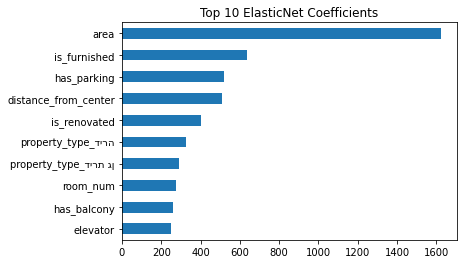

In [159]:
# Show top 10 absolute coefficients
coefs = pd.Series(elastic_cv.coef_, index=X.columns)
coefs.abs().sort_values(ascending=True).tail(10).plot(kind='barh', title="Top 10 ElasticNet Coefficients")
plt.show()

## Elastic Net – Results Summary

The Elastic Net model was trained using 10-fold cross-validation and optimized for `alpha` and `l1_ratio`.  
Below are the results of the model evaluation on the test set:

- **Best alpha:** 1.4563  
- **Best l1_ratio:** 0.95  
- **MAE:** 1351.64  
- **RMSE:** 1928.95  
- **R²:** 0.749  

### Top 5 Most Influential Features:
These features had the highest absolute coefficients in the trained model:

1. `area`: **+1622.45** – Larger apartments are significantly more expensive to rent  
2. `is_furnished`: **+638.23** – Furnished apartments tend to cost more  
3. `has_parking`: **+518.77** – Parking availability increases rental price  
4. `distance_from_center`: **−510.82** – Apartments farther from the center tend to be cheaper  
5. `is_renovated`: **+403.85** – Renovated apartments are generally priced higher  

---

## Step 3 – Decision Tree-Based Model (Random Forest)

As a second model, we use a Random Forest Regressor based on an ensemble of decision trees.

Process:
- Trained on the same preprocessed dataset
- Hyperparameter tuning performed using Grid Search
- Evaluated using 10-fold cross-validation
- Top five most important features identified based on feature importance


In [160]:
rf = RandomForestRegressor(random_state=42)

# היפר-פרמטרים לדוגמה:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    rf, param_distributions=param_dist,
    n_iter=20, cv=10, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42
)

random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_

In [161]:
y_pred_rf = best_rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("🌲 RandomForestRegressor:")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.3f}")

🌲 RandomForestRegressor:
MAE: 1231.82
RMSE: 1853.58
R²: 0.768


In [162]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
top5_rf = importances.sort_values(ascending=False).head(5)
print("Top 5 Important Features (Random Forest):")
print(top5_rf)

Top 5 Important Features (Random Forest):
area                      0.605308
neighborhood_avg_price    0.179659
distance_from_center      0.054460
total_floors              0.026491
is_furnished              0.022075
dtype: float64


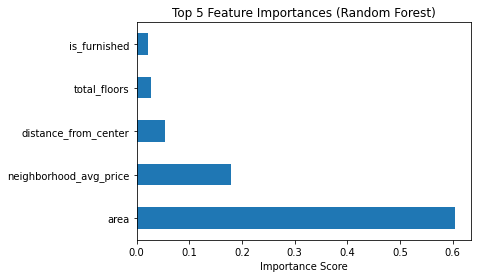

In [163]:
top5_rf.plot(kind='barh', title='Top 5 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.show()

## Random Forest – Results Summary

The Random Forest Regressor was trained with hyperparameter tuning using Grid Search and evaluated using 10-fold cross-validation.

Below are the evaluation metrics on the test set:

- **MAE:** 1231.82  
- **RMSE:** 1853.58  
- **R²:** 0.768  

### Top 5 Most Important Features (by feature importance):

1. `area`: **0.605** – The most dominant feature influencing rental price  
2. `neighborhood_avg_price`: **0.180** – Indicates the average price in the area greatly affects predictions  
3. `distance_from_center`: **0.054** – Distance from central Tel Aviv still plays a role in price  
4. `total_floors`: **0.026** – Taller buildings might be associated with newer or more modern apartments  
5. `is_furnished`: **0.022** – Having furniture contributes to higher predicted rent  


---

## Model Comparison – Elastic Net vs. Random Forest

### 📊 Performance Comparison:
- **Elastic Net** achieved an R² score of **0.749**, with MAE of **1351.64** and RMSE of **1928.95**.
- **Random Forest** slightly outperformed with an R² score of **0.768**, MAE of **1231.82**, and RMSE of **1853.58**.

Although both models performed well, the Random Forest model had **slightly better accuracy**, likely due to its ability to capture **non-linear relationships** between the features and the target variable.

---

### 🔍 Feature Importance Comparison:
There is some overlap between the most important features in both models:

| Elastic Net | Random Forest |
|-------------|----------------|
| `area`               | `area` |
| `is_furnished`       | `is_furnished` |
| `has_parking`        | *(not in top 5)* |
| `distance_from_center` | `distance_from_center` |
| `is_renovated`       | *(not in top 5)* |
| *(–)*                | `neighborhood_avg_price` |
| *(–)*                | `total_floors` |

Both models agree that:
- **`area`** is the most important feature.
- **`distance_from_center`** and **`is_furnished`** also play meaningful roles.

Random Forest also highlighted **`neighborhood_avg_price`** and **`total_floors`**, which might indicate that it is better at capturing complex interactions between features.

---

### 💡 Conclusion:
- **Elastic Net** is simpler, more interpretable, and better suited when relationships are mostly linear.
- **Random Forest** is more flexible and accurate in this case, thanks to its ability to capture complex patterns and interactions.
- The overlap in key features increases our confidence in the reliability of these predictors.

Therefore, while both models are useful, the **Random Forest model offers slightly better predictive performance**, especially for a real-world deployment scenario.


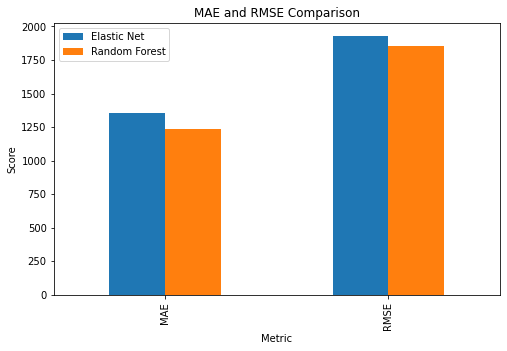

In [164]:
metrics_mae_rmse = pd.DataFrame({
    'Metric': ['MAE', 'RMSE'],
    'Elastic Net': [1351.64, 1928.95],
    'Random Forest': [1231.82, 1853.58]
}).set_index('Metric')

metrics_mae_rmse.plot(kind='bar', figsize=(8,5), title="MAE and RMSE Comparison")
plt.ylabel("Score")
plt.show()

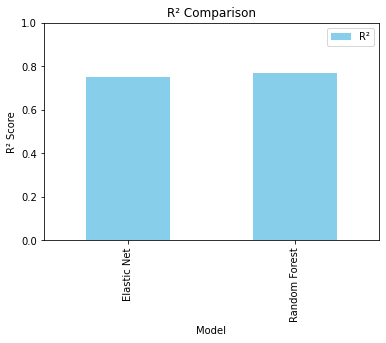

In [165]:
metrics_r2 = pd.DataFrame({
    'Model': ['Elastic Net', 'Random Forest'],
    'R²': [0.749, 0.768]
}).set_index('Model')

metrics_r2.plot(kind='bar', figsize=(6,4), title="R² Comparison", color=['skyblue', 'lightgreen'])
plt.ylabel("R² Score")
plt.ylim(0, 1)  
plt.show()